# Visão Computacional

Considere que uma empresa deseja aumentar sua segurança. Para isso, ela deseja utilizar um sistema computacional que analise imagens capturadas por câmeras, situadas em pontos estratégicos do estabelecimento, auxiliando o serviço dos seguranças locais em identificar se existem pessoas presentes no recinto.  

Para realizar essa tarefa, será utilizado o dataset INRIA PERSON DATASET, disponível em http://pascal.inrialpes.fr/data/human/. Este dataset encontra-se na pasta positive, imagens de lugares com pessoas e na pasta negative, imagens de locais sem pessoas. 


In [24]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt

In [25]:
#Abrindo uma imagem de teste 
img_caminho = './dadosImagem/Treinamento/pos/crop_000010.png'
img_teste = cv2.imread(img_caminho)

Quando utilizamos cv2.imread(caminho,0), o parâmetro 0 serve justamente para indicar que a imagem que queremos é em escala de cinza. Se omitíssemos este parâmetro ou colocássemos 1 em seu lugar, a imagem aberta seria colorida.

In [26]:
#representação matriz
print(img_teste)

[[[133 168 148]
  [139 175 153]
  [157 193 169]
  ...
  [ 22  36  32]
  [ 22  33  30]
  [ 24  34  28]]

 [[128 160 143]
  [144 179 159]
  [159 190 171]
  ...
  [ 23  31  30]
  [ 23  31  30]
  [ 21  33  27]]

 [[130 156 132]
  [152 181 156]
  [178 204 180]
  ...
  [ 20  33  31]
  [ 23  33  33]
  [ 24  34  34]]

 ...

 [[153 163 163]
  [150 160 160]
  [138 148 148]
  ...
  [126 144 161]
  [133 155 169]
  [137 164 171]]

 [[140 154 155]
  [135 149 150]
  [122 137 138]
  ...
  [129 149 163]
  [135 159 169]
  [141 169 176]]

 [[128 150 155]
  [119 141 146]
  [110 132 137]
  ...
  [132 161 166]
  [133 162 167]
  [152 179 183]]]


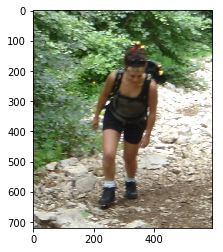

Original (720, 594, 3)


In [27]:
# cv2.imshow("Display window", img_teste)
# cv2.waitKey()

#Show the image with matplotlib
plt.imshow(cv2.cvtColor(img_teste, cv2.COLOR_BGR2RGB))
plt.show()
print('Original', img_teste.shape)

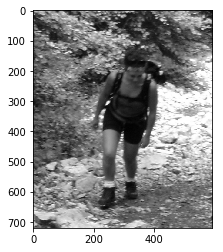

Escala de cinza (720, 594)


In [28]:
#Transformando a imagem em escala de cinza
img_cinza = cv2.cvtColor(img_teste, cv2.COLOR_RGB2GRAY)
plt.imshow(img_cinza, cmap='gray')
plt.show()
print('Escala de cinza', img_cinza.shape)

In [29]:
img_redimensionada = cv2.resize(img_cinza, (360,360), interpolation=cv2.INTER_CUBIC)
plt.imshow(img_redimensionada, cmap='gray')
plt.show()
print('Redimensionada', img_redimensionada.shape)

Redimensionada (360, 360)


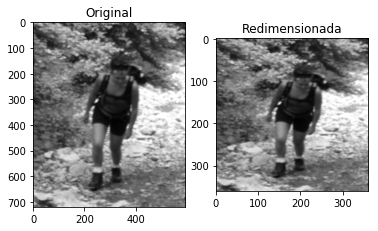

In [30]:
plt.subplot(121)
plt.title('Original')
plt.imshow(img_cinza, cmap='gray', interpolation='bicubic')
plt.subplot(122)
plt.title('Redimensionada')
plt.imshow(img_redimensionada, cmap='gray', interpolation='bicubic')
plt.show()

In [31]:
#Construindo o histograma
import numpy as np
histograma = cv2.calcHist([img_redimensionada], [0], None, [256], [0,256])
plt.plot(histograma)
plt.show()

In [32]:
#Equalização da imagem
img_equalizada = cv2.equalizeHist(img_redimensionada)
plt.plot(img_equalizada)
plt.show()

Por meio da equalização podemos consertar o brilho e o contraste da imagem

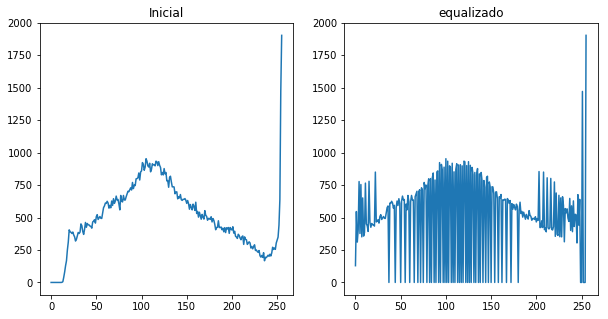

In [33]:
histograma_equalizado = cv2.calcHist([img_equalizada], [0], None, [256], [0,256])

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Inicial')
plt.plot(histograma)
plt.subplot(122)
plt.title('equalizado')
plt.plot(histograma_equalizado)


Observe que as cores foram mais distribuídas no decorrer do espaço de cores, modificando a intensidade dos pixels, isto torna os objetos mais facilmente diferenciáveis. 

Os histogramas são úteis de várias formas no processamento de imagens, uma delas é para determinar o Threshold para segmentação da imagem e determinar qual o melhor algoritmo a se escolher.

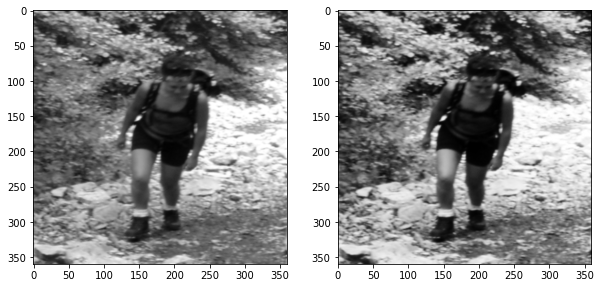

In [34]:
plt.figure(figsize = (10,10))
plt.subplot(121)
plt.imshow(img_redimensionada, cmap= 'gray', interpolation='bicubic')
plt.subplot(122)
plt.imshow(img_equalizada, cmap= 'gray', interpolation='bicubic')
plt.show()

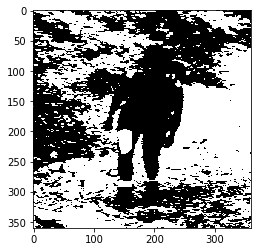

In [35]:
#Binarização da imagem
valor_retorno, img_binzarizada = cv2.threshold(img_equalizada, 127, 255, cv2.THRESH_BINARY)
plt.imshow( img_binzarizada, cmap='gray')
plt.show()

In [36]:
#imagem binarizada de OTSU com eliminação de ruídos 
imagem = cv2.GaussianBlur(img_equalizada,(9,9), 1)
valor_retorno_otsu, img_binzarizada_otsu = cv2.threshold(imagem, 0, 255, cv2.THRESH_BINARY+ cv2.THRESH_OTSU)
plt.imshow( img_binzarizada_otsu, cmap='gray')
plt.show()

A suavização Gaussiana (GaussianBlur) ajuda a melhorar as transições da imagem. 

In [37]:
histograma_binarizado = cv2.calcHist([img_binzarizada_otsu], [0], None, [256], [0,256])

plt.figure(figsize=(10,5))
plt.subplot(131)
plt.title('Inicial')
plt.plot(histograma)
plt.subplot(132)
plt.title('equalizado')
plt.plot(histograma_equalizado)
plt.subplot(133)
plt.title('binarizado')
plt.plot(histograma_binarizado)

No caso do histograma, ele torna o gráfico mais suave também, reduzindo alguns pequenos pontos de pico pelo fato do ruído.

Uma das formas de descrever uma imagem é por meio da extração de descritores dela. Um tipo de descritor são as bordas da imagem.

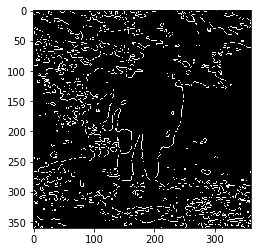

In [38]:
#Detecção de bordas
canny = cv2.Canny(img_binzarizada_otsu,50,100)
plt.imshow( canny, cmap='gray')
plt.show()

In [39]:
def get_pontos_chave(img_caminho):
    
    LARGURA = 360
    ALTURA = 360
    
    # Ler a imgem
    img_teste = cv2.imread(img_caminho, 0)
    
    #Redimensionar
    img_redimensionada = cv2.resize(img_teste, (LARGURA, ALTURA), interpolation=cv2.INTER_CUBIC)
    
    # Remover ruídos
    img_equalizada = cv2.equalizeHist(img_redimensionada)
    img_suavizada = cv2.GaussianBlur(img_equalizada, (9,9), 1)
    
    #Detectar pontos chaves
    orb = cv2.ORB_create(nfeatures=512)
    pontos_chave = orb.detect(img_suavizada, None)
    
    return pontos_chave, img_suavizada

In [40]:
#Deteção de pontos de referência
pontos_chave, descritores = get_pontos_chave(img_caminho)

print("Tipo: ", type(descritores))
print("Formato descritor : ", descritores.shape)
print("descritor[0]: ", descritores[0])

Tipo:  <class 'numpy.ndarray'>
Formato descritor :  (360, 360)
descritor[0]:  [183 192 207 215 213 202 185 171 165 171 182 192 198 198 196 198 201 199
 192 180 167 155 144 138 141 151 166 181 192 198 200 199 198 196 192 186
 177 165 151 142 139 139 133 116  92  68  48  38  36  40  50  70  96 118
 137 156 170 175 168 148 122  96  73  56  44  36  30  27  25  24  24  23
  22  22  25  34  53  76  94 105 110 115 120 127 132 132 128 119 110 102
 100 107 119 133 145 154 161 167 169 166 160 155 153 157 166 178 189 198
 203 202 196 185 173 164 158 154 148 141 137 141 153 165 172 176 177 176
 172 170 177 192 204 209 205 196 186 176 167 161 162 168 174 172 161 145
 135 140 149 149 137 125 118 119 125 132 134 131 124 114 106 106 115 132
 152 171 185 191 187 176 157 134 110  87  71  67  71  78  85  92 101 112
 120 124 123 126 136 147 157 167 179 188 190 183 172 167 173 184 193 198
 201 200 190 165 125  81  52  41  38  38  37  38  41  46  52  58  67  81
  99 108 106  93  80  78  89 107 114 105  84  

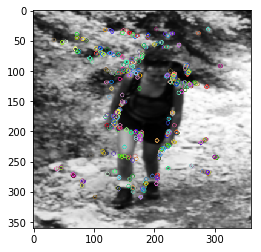

In [41]:
#Detecção de pontos chaves
img_pontos = cv2.drawKeypoints(imagem, pontos_chave, outImage = np.array([]), flags=0)
plt.imshow( img_pontos, cmap='gray')
plt.show()

Tipo:  <class 'numpy.ndarray'>
Formato descritor :  (512, 32)

 descritor[0]:  [ 74 178 113 225 161  44 121 151  43  57  56 125 159  31  72 153 167  19
 221  49 147  24  17 213 207 217  58 230 202 132 131  59]


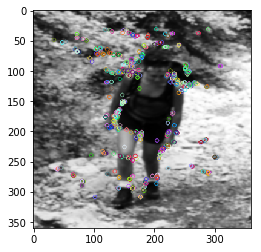

In [42]:
def get_descritores(img_caminho):
    
    LARGURA = 360
    ALTURA = 360
    
    # Ler a imgem
    img_teste = cv2.imread(img_caminho, 0)
    
    #Redimensionar
    img_redimensionada = cv2.resize(img_teste, (LARGURA, ALTURA), interpolation=cv2.INTER_CUBIC)
    
    # Remover ruídos
    img_equalizada = cv2.equalizeHist(img_redimensionada)
    img_suavizada = cv2.GaussianBlur(img_equalizada, (9,9), 1)
    
    #Detectar pontos chaves
    orb = cv2.ORB_create(nfeatures=512)
    pontos_chave = orb.detect(img_suavizada, None)
    
    pontos_chave, descritores = orb.compute(img_suavizada, pontos_chave)
    
    return descritores

"""- ORB - Oriented FAST and Ratated BRIEF
- SURF - Speeded up robust features
- SIFT - Scale-invariant feature transform
"""

descritor = get_descritores(img_caminho)

print("Tipo: ", type(descritor))
print("Formato descritor : ", descritor.shape)
print("\n descritor[0]: ", descritor[0])

img_pontos = cv2.drawKeypoints(imagem, pontos_chave, outImage = np.array([]), flags=0)
plt.imshow( img_pontos, cmap='gray')
plt.show()

Os descritores devem apresentar invarância de escala, invariância em rotações e translações.

In [43]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import os

o algoritmo Bag-of-Visual-Words (Pacote de Palavras virtuais em português), com o objetivo de simplificar e reduzir a dimensionalidade da nossa base de dados.

In [47]:
QUANTIDADE_PALAVRAS_VIRTUAIS = 256

class PacoteDePalavras:

    def gerar_dicionario(self, lista_descritores):
        kmeans = KMeans(n_clusters = QUANTIDADE_PALAVRAS_VIRTUAIS)
        kmenas = kmeans.fit(lista_descritores)
        self.dicionario = kmeans.cluster_centers_

    def histograma_de_frequencia(self, descritor):

        try:
            algoritmo_knn = NearestNeighbors(n_neighbors = 1)
            algoritmo_knn.fit(self.dicionario)
            mais_proximos = algoritmo_knn.kneighbors(descritor, return_distance = False).flatten()

            histograma_caracteristica = np.histogram(mais_proximos, bins=np.arange(self.dicionario.shape[0]+1))[0]

            return histograma_caracteristica
        except AttributeError:
            print("O atributo dicionario nao foi definido")

    def salvar_dicionario(self, caminho='', nome_dicionario = 'dicionario.csv'):
        try:
            np.savetxt(os.path.join(caminho, nome_dicionario), self.dicionario, delimiter=',', fmt='%f')
            print("Dicionario salvo")

        except AttributeError:
            print("Dicionario Vazio")

    def carregar_dicionario(self, caminho='', nome_dicionario = 'dicionario.csv'):
        self.dicionario = np.loadtxt(os.path.join(caminho,nome_dicionario), delimiter=',')

In [48]:
teste_palavras_virtuais = PacoteDePalavras()
teste_palavras_virtuais.gerar_dicionario(descritor)
histogramaCaracteristicas = teste_palavras_virtuais.histograma_de_frequencia(descritor)
print(histogramaCaracteristicas)

[6 4 5 3 3 1 4 2 3 2 1 3 1 1 3 2 2 3 3 4 1 3 2 3 2 2 2 4 3 3 3 1 2 1 2 6 3
 4 6 4 2 4 2 3 1 2 6 1 3 4 2 2 2 2 4 3 1 3 4 3 3 3 3 3 5 3 3 1 2 5 2 2 4 2
 1 3 1 2 2 2 2 4 2 2 4 2 2 1 2 1 1 2 2 2 1 1 1 3 1 2 3 2 4 4 2 3 1 2 2 2 3
 2 1 3 2 2 1 4 3 1 2 2 4 2 2 3 2 1 4 3 2 4 3 3 1 2 2 2 1 1 3 2 1 2 4 3 1 2
 1 2 1 3 2 1 1 1 1 2 2 1 1 1 2 2 1 3 1 1 1 1 2 1 2 2 1 1 3 1 1 2 1 2 1 1 1
 1 2 2 1 1 4 2 2 3 2 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 1
 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [49]:
DICIONARIO_NOME = 'dicionario.csv'
dados_treinamento = ['dadosImagem/Treinamento']

# Rotina para criação do dicionario de palavras virtuais

descritores = np.empty((0,32), dtype=np.uint8)

for caminho in dados_treinamento:

    for raiz,diretorios,arquivos in os.walk(caminho):

        for arquivo in arquivos:
            if arquivo.endswith('.png'):
                orb_descritor = get_descritores(os.path.join(caminho,arquivo))
                descritores = np.append(descritores, orb_descritor, axis=0)

img_representacao = PacoteDePalavras()
img_representacao.gerar_dicionario(descritores)
img_representacao.salvar_dicionario('dadosImagem/', DICIONARIO_NOME)

error: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [50]:
DICIONARIO_NOME = 'dicionario256.csv'

# Rotina para criação do dicionario de palavras virtuais

descritores = np.empty((0,32), dtype=np.uint8)

for caminho in dados_treinamento:

    for raiz,diretorios,arquivos in os.walk(caminho):

        for arquivo in arquivos:
            if arquivo.endswith('.png'):
                orb_descritor = get_descritores(os.path.join(caminho,arquivo))
                descritores = np.append(descritores, orb_descritor, axis=0)

img_representacao = PacoteDePalavras()
img_representacao.gerar_dicionario(descritores)
img_representacao.salvar_dicionario('Aula/', DICIONARIO_NOME)

error: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
